Genauigkeit: 0.98


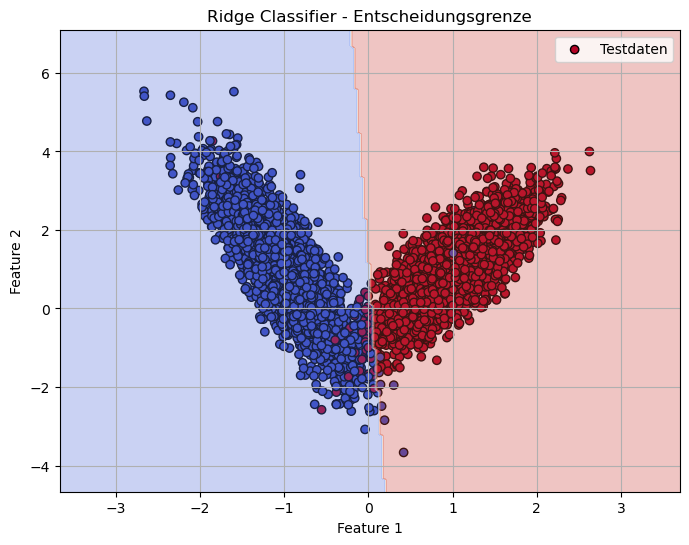

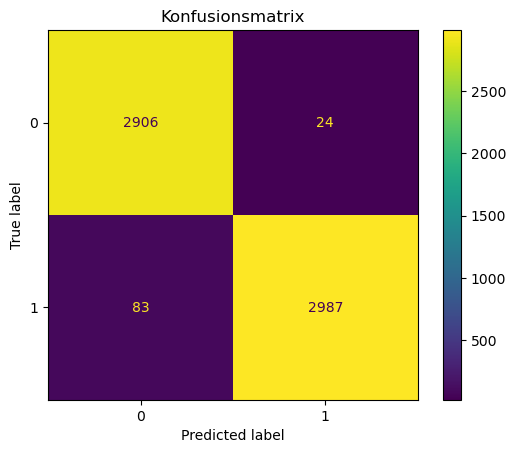

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Beispiel-Daten generieren (2 Klassen, 2 Features)
input_data, output_data = make_classification(n_samples=20000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Daten aufteilen
input_data_train, input_data_test, output_data_train, output_data_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

# Ridge Classifier trainieren
model = RidgeClassifier(alpha=1.0)
model.fit(input_data_train, output_data_train)

# Vorhersage und Genauigkeit
output_data_pred = model.predict(input_data_test)
acc = accuracy_score(output_data_test, output_data_pred)
print(f"Genauigkeit: {acc:.2f}")

# Entscheidungsgrenze plotten
plt.figure(figsize=(8, 6))
plt.scatter(input_data_test[:, 0], input_data_test[:, 1], c=output_data_test, edgecolors='k', cmap='coolwarm', label="Testdaten")

# Entscheidungsgrenze berechnen
xx, yy = np.meshgrid(np.linspace(input_data[:,0].min()-1, input_data[:,0].max()+1, 200),
                     np.linspace(input_data[:,1].min()-1, input_data[:,1].max()+1, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Ridge Classifier - Entscheidungsgrenze")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Konfusionsmatrix
ConfusionMatrixDisplay.from_predictions(output_data_test, output_data_pred)
plt.title("Konfusionsmatrix")
plt.grid(False)
plt.show()